<a href="https://colab.research.google.com/github/s4bih/machine-learning/blob/main/prediksi_hujan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data collection

In [4]:
import pandas as pd
file_id = '1ha6-YJq02MBaSPgTSPg3kTqXNI0TYzqi'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)
data

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


# Data processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [6]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [7]:
data.isnull().sum()

,0
DATE,0
PRCP,3
TMAX,0
TMIN,0
RAIN,3


In [8]:
data.duplicated().sum()

np.int64(0)

# data cleaning

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

,0
DATE,0
PRCP,0
TMAX,0
TMIN,0
RAIN,0


# Data formating

In [11]:
#cahnging columns to neccesary data type
data = data.astype({'DATE':'datetime64[ns]','RAIN': 'int16'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25548 non-null  datetime64[ns]
 1   PRCP    25548 non-null  float64       
 2   TMAX    25548 non-null  int64         
 3   TMIN    25548 non-null  int64         
 4   RAIN    25548 non-null  int16         
dtypes: datetime64[ns](1), float64(1), int16(1), int64(2)
memory usage: 1.0 MB


# Exploratory Data Analysis(EDA)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Monthly rain

In [13]:
data['MONTH'] = data['DATE'].dt.month
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN,MONTH
0,1948-01-01,0.47,51,42,1,1
1,1948-01-02,0.59,45,36,1,1
2,1948-01-03,0.42,45,35,1,1
3,1948-01-04,0.31,45,34,1,1
4,1948-01-05,0.17,45,32,1,1


In [14]:
#create a pivot table
monthly_rain = data.pivot_table( index=['RAIN'], columns=['MONTH'], aggfunc='size',fill_value = 0)
monthly_rain

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
RAIN,,,,,,,,,,,,
0,872,875,958,1102,1399,1466,1827,1757,1490,1220,836,846
1,1298,1103,1212,998,771,632,343,413,609,950,1264,1307


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25548 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25548 non-null  datetime64[ns]
 1   PRCP    25548 non-null  float64       
 2   TMAX    25548 non-null  int64         
 3   TMIN    25548 non-null  int64         
 4   RAIN    25548 non-null  int16         
 5   MONTH   25548 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int16(1), int32(1), int64(2)
memory usage: 1.1 MB


In [16]:
#select the row where rain is 1
monthly_rain = monthly_rain.loc[1]
monthly_rain

,1
MONTH,
1,1298
2,1103
3,1212
4,998
5,771
6,632
7,343
8,413
9,609


In [17]:
#extract the keys(month) and value(count)
months = monthly_rain.keys()
counts = monthly_rain.values

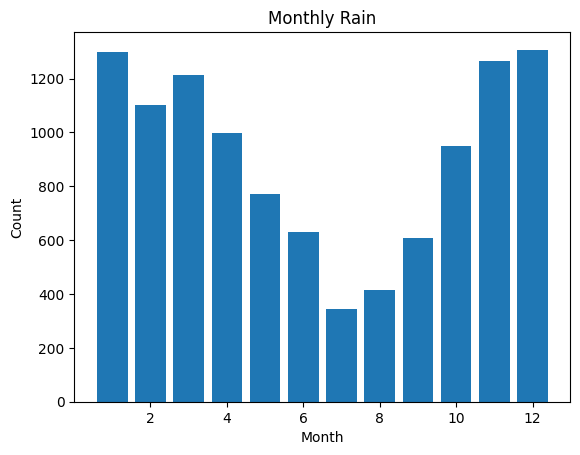

In [18]:
#create a bar plot
plt.bar(months,counts)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Rain')
plt.show()

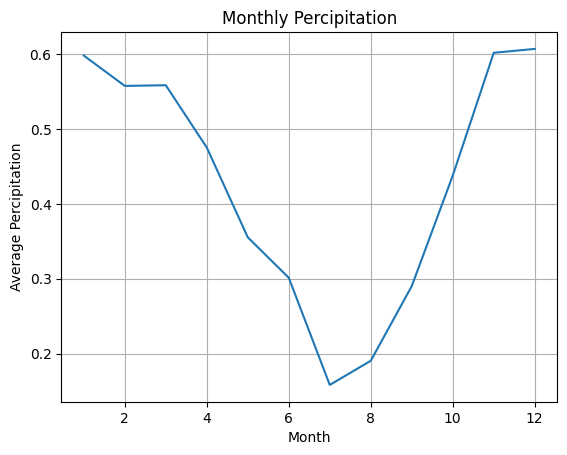

In [19]:
#monthly percipitation
#calculate the average percipitation
average_percipitation = data.groupby('MONTH')['RAIN'].mean()


#create a line plot
plt.plot(average_percipitation.index, average_percipitation.values)
plt.xlabel('Month')
plt.ylabel('Average Percipitation')
plt.title('Monthly Percipitation')
plt.grid(True)
plt.show()

In [20]:
#calculate the average max and min temperature by mounth
average_max_temp = data.groupby('MONTH')['TMAX'].mean()
average_min_temp = data.groupby('MONTH')['TMIN'].mean()

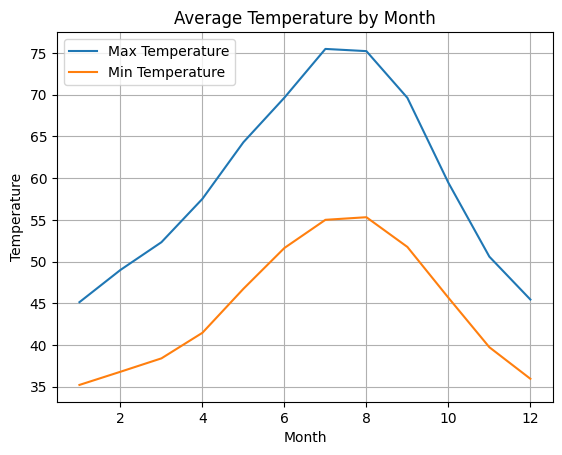

In [21]:
#create a line plot
plt.plot(average_max_temp.index, average_max_temp.values, label='Max Temperature')
plt.plot(average_min_temp.index, average_min_temp.values, label='Min Temperature')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.title('Average Temperature by Month')
plt.grid(True)
plt.show()



In [22]:
data['DATE'] = pd.to_datetime(data['DATE'])
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month

data.head()


,DATE,PRCP,TMAX,TMIN,RAIN,MONTH,YEAR
0,1948-01-01,0.47,51,42,1,1,1948
1,1948-01-02,0.59,45,36,1,1,1948
2,1948-01-03,0.42,45,35,1,1,1948
3,1948-01-04,0.31,45,34,1,1,1948
4,1948-01-05,0.17,45,32,1,1,1948


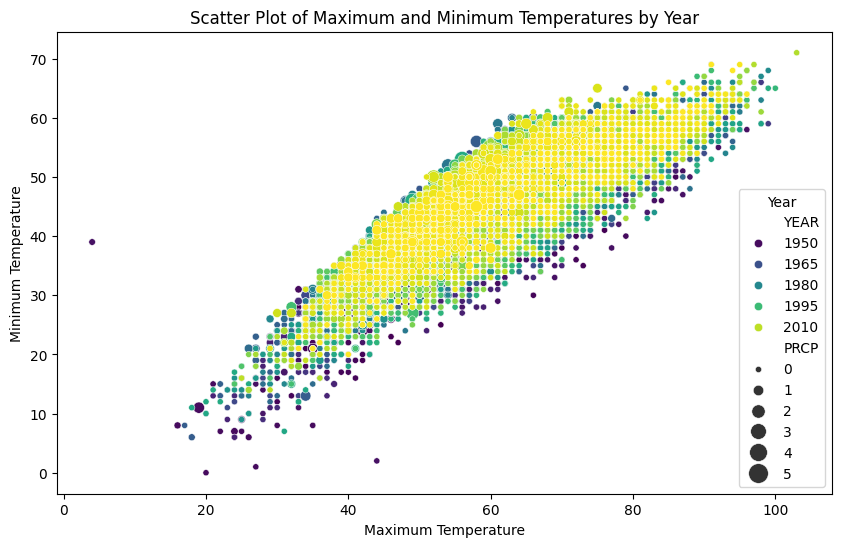

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TMAX', y='TMIN', hue='YEAR', data=data, palette='viridis', size = 'PRCP', sizes=(20, 200))
plt.xlabel('Maximum Temperature')
plt.ylabel('Minimum Temperature')
plt.title('Scatter Plot of Maximum and Minimum Temperatures by Year')
plt.legend(title='Year')
plt.show()



In [24]:
#calculate average yearly precipitation
average_yearly_precipitation = data.groupby('YEAR')['PRCP'].mean().reset_index()
average_yearly_precipitation

,YEAR,PRCP
0,1948,0.125109
1,1949,0.088932
2,1950,0.151068
3,1951,0.110411
4,1952,0.064973
...,...,...
65,2013,0.089205
66,2014,0.132877
67,2015,0.122822
68,2016,0.123443


<ipython-input-25-88f38294897b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='YEAR', y='PRCP', data=average_yearly_precipitation, palette='viridis')


Text(0.5, 1.0, 'Average Yearly Precipitation')

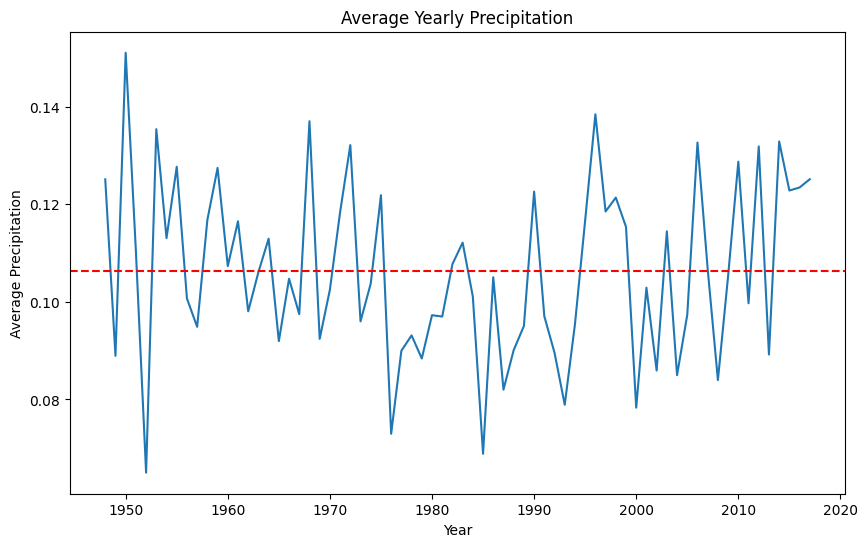

In [25]:
#create plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='YEAR', y='PRCP', data=average_yearly_precipitation, palette='viridis')
plt.axhline(y=average_yearly_precipitation['PRCP'].mean(), color='r', linestyle='--', label='Average Precipitation')
plt.xlabel('Year')
plt.ylabel('Average Precipitation')
plt.title('Average Yearly Precipitation')


In [26]:
#convert the date column into a float data type
data['DATE'] = pd.to_datetime(data['DATE'])
data['DATE'] = data['DATE'].astype('int64') / 1e9
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25548 entries, 0 to 25550
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25548 non-null  float64
 1   PRCP    25548 non-null  float64
 2   TMAX    25548 non-null  int64  
 3   TMIN    25548 non-null  int64  
 4   RAIN    25548 non-null  int16  
 5   MONTH   25548 non-null  int32  
 6   YEAR    25548 non-null  int32  
dtypes: float64(2), int16(1), int32(2), int64(2)
memory usage: 1.2 MB


In [27]:
X = data.drop('RAIN', axis=1)
y = data['RAIN']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train', X_train.shape)
print('x_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (20438, 6)
x_test (5110, 6)
y_train (20438,)
y_test (5110,)


In [29]:
#logist regresion model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:
y_pred[:50]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int16)

# evaluating

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

#calculate the evaluation metricd
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)



# predict

In [38]:
import pandas as pd

#create a new data point for prediction
new_data = {
    'DATE': ['2023-08-30'],  # Replace with your desired date
    'PRCP': [0.2],           # Replace with your precipitation value
    'TMAX': [68],            # Replace with your maximum temperature value
    'TMIN': [50],# Replace with your minimum temperature value
    'MONTH': [8],            # Replace with the desired month
    'YEAR': [2023]           # Replace with the desired year
    }

# Convert the dictionary to DataFrame
new_data = pd.DataFrame(new_data)

# Convert 'DATE' column to datetime and then to numerical representation
new_data['DATE'] = pd.to_datetime(new_data['DATE'])
new_data['DATE'] = new_data['DATE'].astype('int64') / 1e9

# Get the prediction
prediction = model.predict(new_data)
if prediction == 1:
  print('it will rain')
else :
  print('it will not rain')

it will not rain


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array={'DATE': Index([1693353600.0], dtype='float64'), 'PRCP': [0.2], 'TMAX': [68], 'TMIN': [50]}.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.